In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("/content/nlp_data_with_multiclass_sentiment.csv")

In [36]:
sentiment_mapping = {
    '1 star' : 'Very Negative Sentiment',
    '2 stars' : 'Negative Sentiment',
    '3 stars' : 'Neutral Sentiment',
    '4 stars' : 'Positive Sentiment',
    '5 stars' : 'Very Positive Sentiment'
}

# Replace star ratings with corresponding sentiment labels
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

In [38]:
# Calculate the count of each emotion type per year
emotion_counts = df.groupby(['year', 'Sentiment']).size().unstack(fill_value=0)

In [41]:
# Convert counts to percentages
emotion_percentages = emotion_counts.div(emotion_counts.sum(axis=1), axis=0) * 100

emotion_percentages = emotion_percentages[['Very Negative Sentiment', 'Negative Sentiment', 'Neutral Sentiment',
                                       'Positive Sentiment', 'Very Positive Sentiment']]


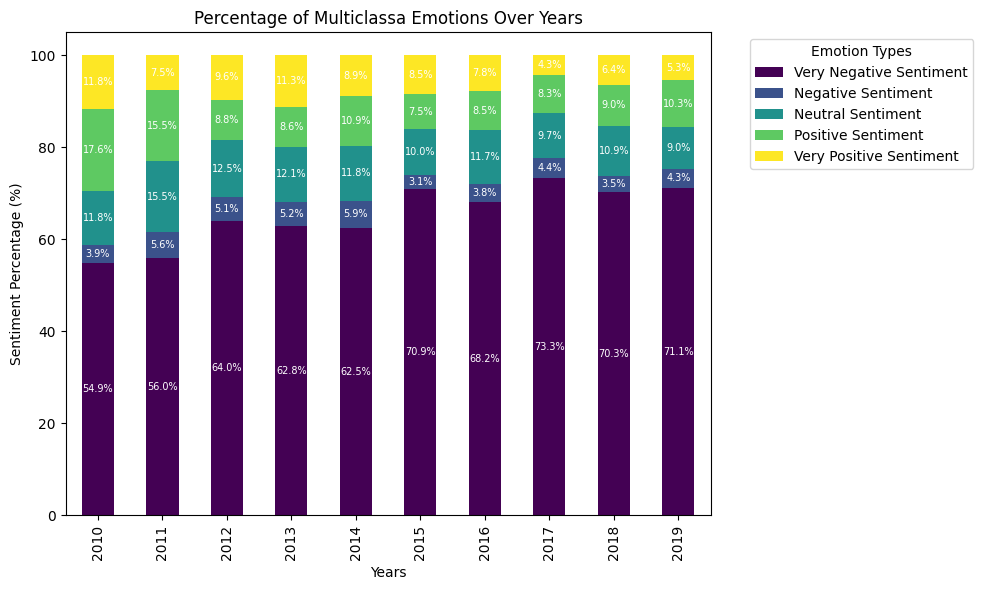

In [44]:
# Plot the stacked bar chart
ax = emotion_percentages.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

# Add percentage labels within each bar segment
for i, year in enumerate(emotion_percentages.index):
    cumulative_sum = 0
    for emotion in emotion_percentages.columns:
        percentage = emotion_percentages.loc[year, emotion]
        if percentage > 0:  # Only label if the percentage is greater than 0
            ax.text(
                i,  # X coordinate
                cumulative_sum + percentage / 2,  # Y coordinate (middle of the bar segment)
                f"{percentage:.1f}%",  # Display percentage with 1 decimal place
                ha='center', va='center', color='white', fontsize=7
            )
        cumulative_sum += percentage

# Customize the chart
plt.title('Percentage of Multiclassa Emotions Over Years')
plt.xlabel('Years')
plt.ylabel('Sentiment Percentage (%)')
plt.legend(title='Emotion Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()